In [19]:
import pandas as pd

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Upload csv file
data = r'C:\repos\immo-eliza-team6-analysis\analysis\PL_clean_data.csv' # Fill your path to file
df = pd.read_csv(data, sep = ',')


df.dtypes


id                      int64
locality_name          object
Postal_code            object
Price                   int64
Subtype                object
Number_of_bedrooms      int64
Living_area             int64
street                 object
number                 object
latitude              float64
longitude             float64
Open_fire               int64
Swimming_Pool           int64
hasTerrace              int64
terraceSurface          int64
gardenSurface           int64
Kitchen_type           object
Number_of_facades       int64
State_of_building      object
Furnished               int64
epc                    object
dtype: object

In [20]:
# transform dtypes 'object' to 'category'
int_columns = df.select_dtypes(include=['object'])

for col in int_columns.columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  7134 non-null   int64   
 1   locality_name       7134 non-null   category
 2   Postal_code         7134 non-null   category
 3   Price               7134 non-null   int64   
 4   Subtype             7134 non-null   category
 5   Number_of_bedrooms  7134 non-null   int64   
 6   Living_area         7134 non-null   int64   
 7   street              7134 non-null   category
 8   number              7108 non-null   category
 9   latitude            7125 non-null   float64 
 10  longitude           7125 non-null   float64 
 11  Open_fire           7134 non-null   int64   
 12  Swimming_Pool       7134 non-null   int64   
 13  hasTerrace          7134 non-null   int64   
 14  terraceSurface      7134 non-null   int64   
 15  gardenSurface       7134 non-null   in

In [21]:
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')

df.corr(method='pearson', min_periods=1, numeric_only=True)

,id,Price,Number_of_bedrooms,Living_area,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Number_of_facades,Furnished
id,1.000000,-0.088953,-0.070675,-0.102077,0.045275,-0.079682,-0.017196,-0.044521,0.015576,-0.017218,-0.041391,-0.070148,-0.005120
Price,-0.088953,1.000000,0.357637,0.526756,0.217834,-0.063270,0.110082,0.281491,0.041604,0.043028,0.143753,0.156068,0.037925
Number_of_bedrooms,-0.070675,0.357637,1.000000,0.556377,0.025280,0.012521,0.093603,0.141250,0.043365,0.038342,0.089865,0.091020,0.026039
Living_area,-0.102077,0.526756,0.556377,1.000000,0.091314,0.025325,0.159373,0.247002,0.004876,0.042182,0.129285,0.151165,0.010488
latitude,0.045275,0.217834,0.025280,0.091314,1.000000,-0.495857,-0.010394,0.040160,-0.091840,-0.059083,-0.047032,-0.092381,-0.025019
longitude,-0.079682,-0.063270,0.012521,0.025325,-0.495857,1.000000,0.067524,0.047185,0.088021,0.077614,0.075080,0.237571,0.005698
Open_fire,-0.017196,0.110082,0.093603,0.159373,-0.010394,0.067524,1.000000,0.123685,0.053003,0.052960,0.086435,0.157827,0.009954
Swimming_Pool,-0.044521,0.281491,0.141250,0.247002,0.040160,0.047185,0.123685,1.000000,0.065466,0.050548,0.072294,0.129342,0.011787
hasTerrace,0.015576,0.041604,0.043365,0.004876,-0.091840,0.088021,0.053003,0.065466,1.000000,0.167575,0.047707,0.110604,0.042994
terraceSurface,-0.017218,0.043028,0.038342,0.042182,-0.059083,0.077614,0.052960,0.050548,0.167575,1.000000,0.097845,0.052146,0.017837


In [27]:
# Removing unnecessary columns

columns_to_drop = ['latitude', 'longitude', 'id', 'Type_of_sale', 'street', 'number']
df = df.drop(columns=columns_to_drop, errors='ignore')

df['price_per_sqm'] = df['Price'] / df['Living_area']
df['post_1'] = df['Postal_code'].str[0]
df['post_2'] = df['Postal_code'].str[0:2]

# Display first 5 rows
df.shape


(7134, 19)

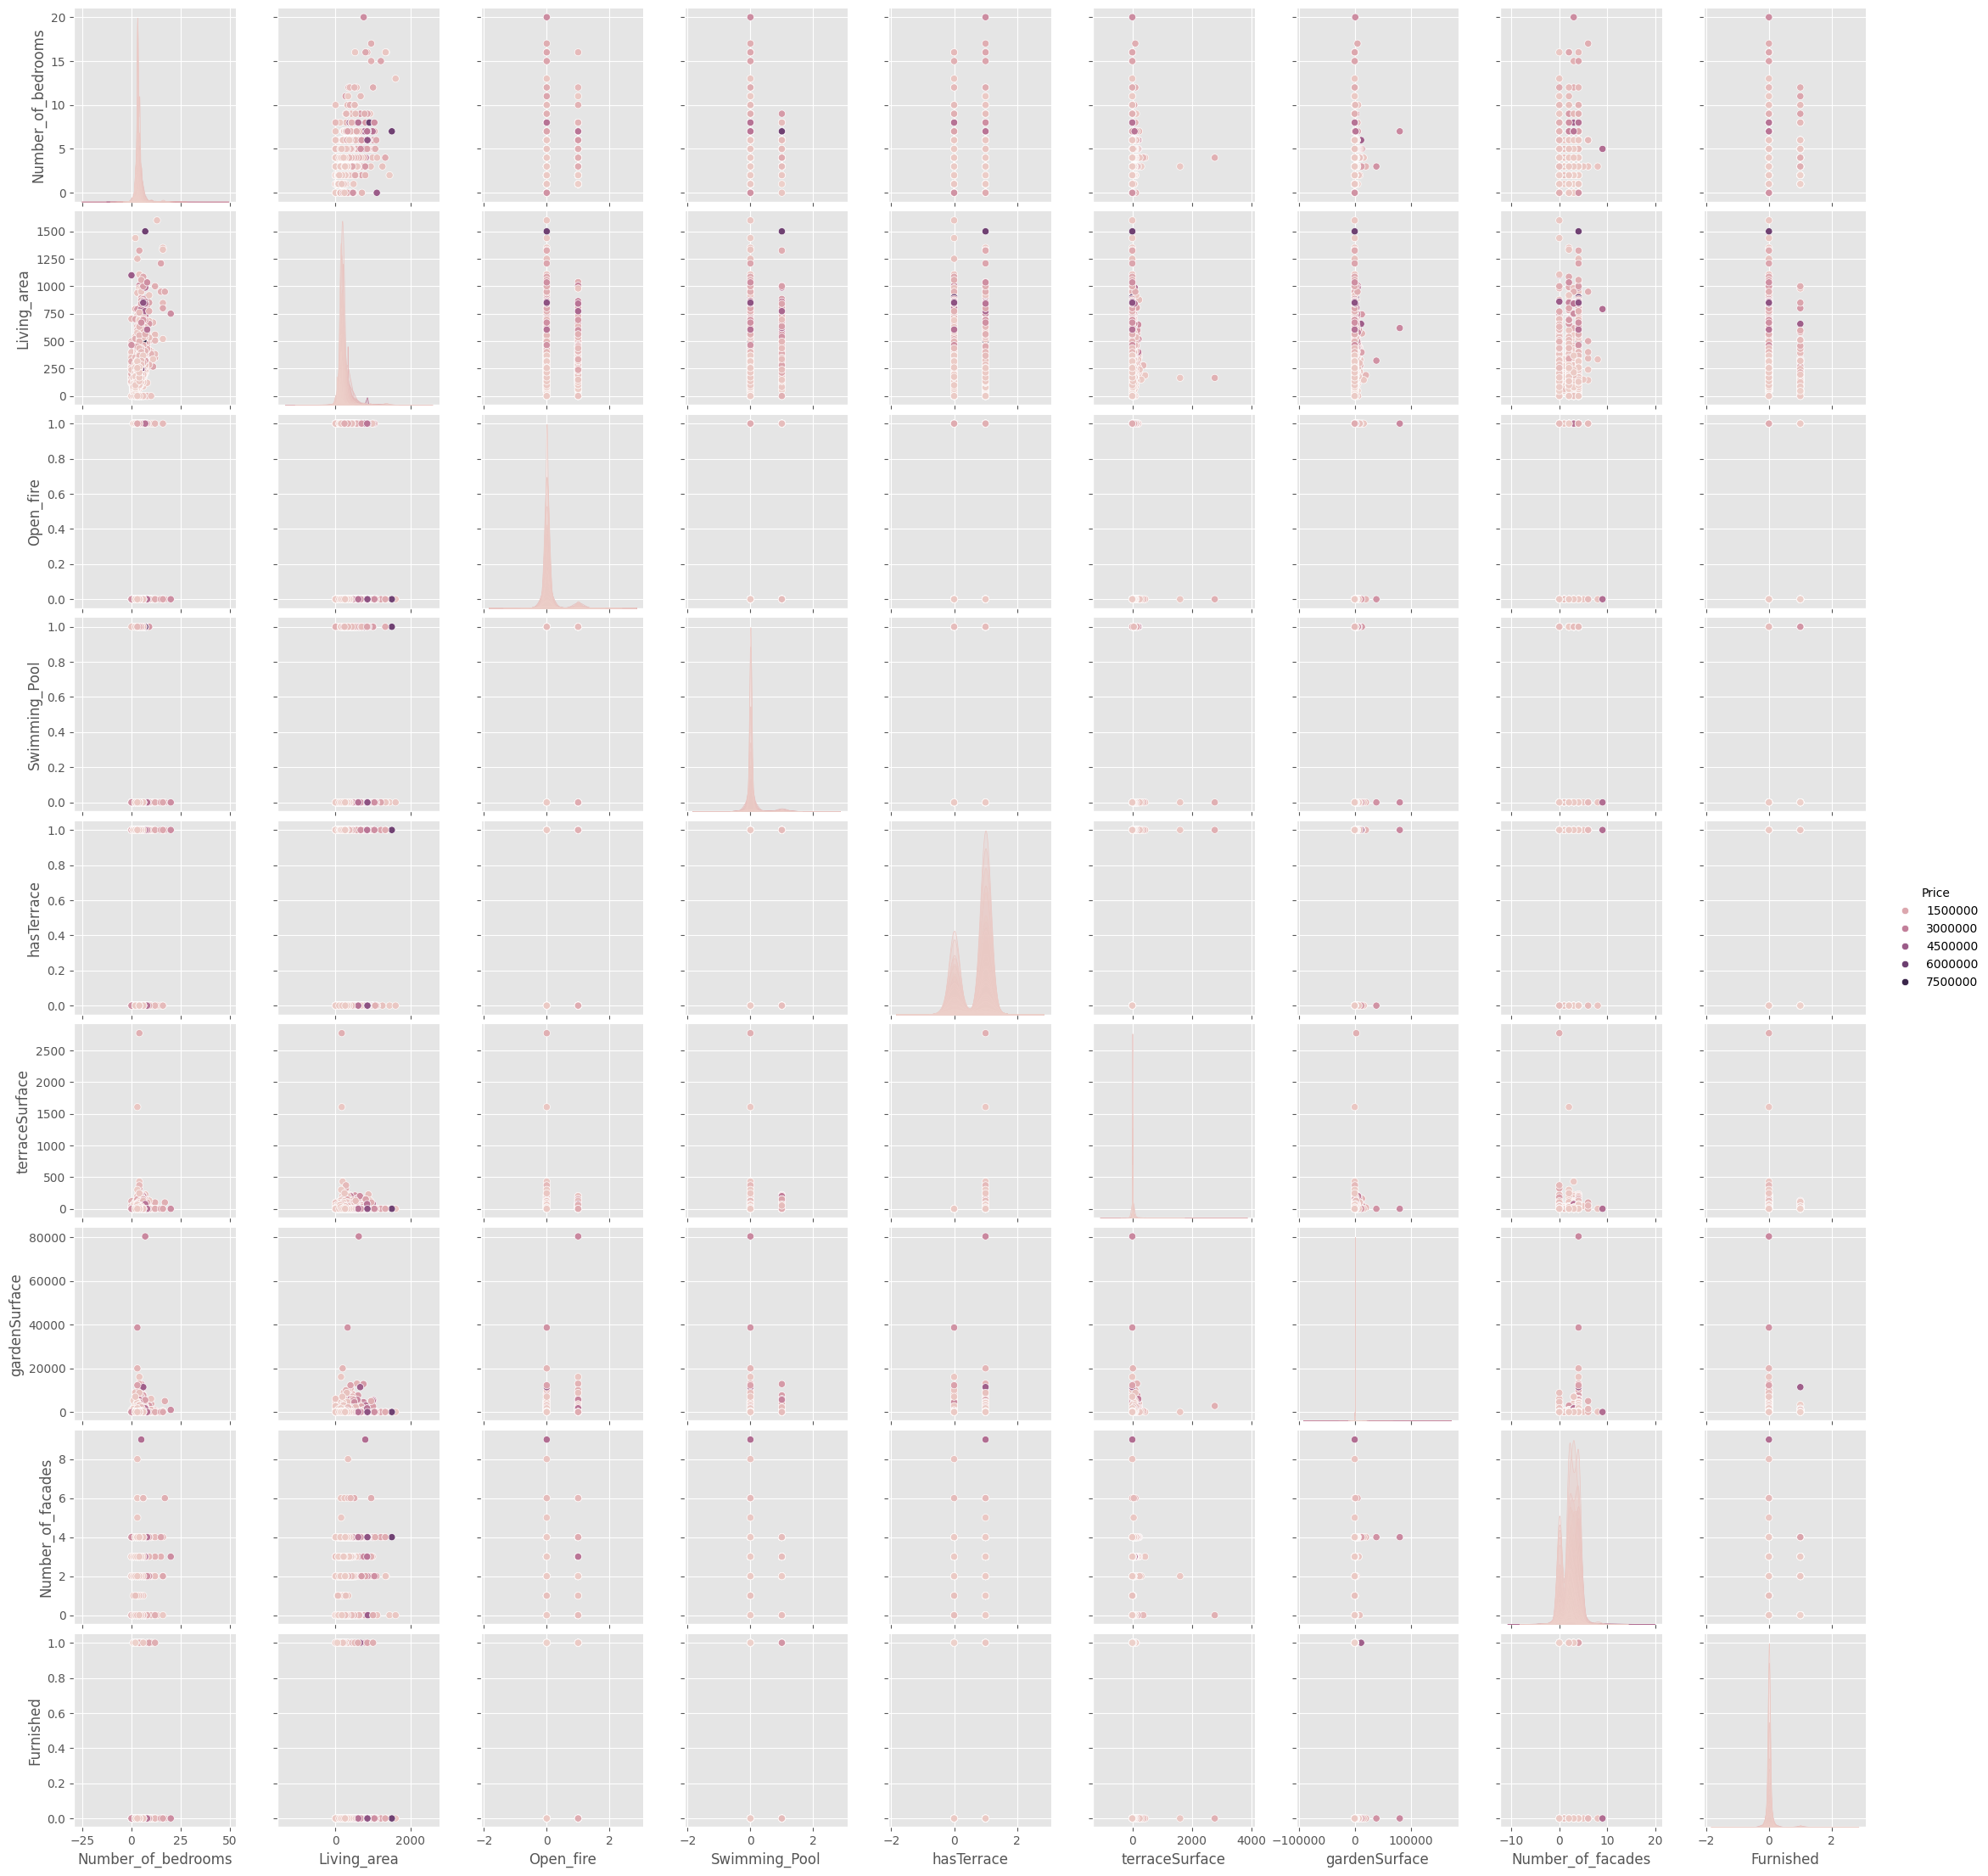

In [23]:
sns.pairplot(df, hue='Price')
plt.show()

In [17]:
print(df.columns)

Index(['locality_name', 'Postal_code', 'Price', 'Subtype',
       'Number_of_bedrooms', 'Living_area', 'Open_fire', 'Swimming_Pool',
       'hasTerrace', 'terraceSurface', 'gardenSurface', 'Kitchen_type',
       'Number_of_facades', 'State_of_building', 'Furnished', 'epc'],
      dtype='object')


In [18]:
#sns.set_style('darkgrid')

# Convert categorical columns to numeric codes
df['Kitchen_type'] = df['Kitchen_type'].astype('category')
df['State_of_building'] = df['State_of_building'].astype('category')
df['Furnished'] = df['Furnished'].astype('category')

#cols_to_plot = ['Price', 'Subtype', 'Number_of_bedrooms', 'Living_area', 'Open_fire', 'Swimming_Pool', 'hasTerrace', 'gardenSurface' , 'Kitchen_type','Number_of_facades','State_of_building','Furnished','epc']
cols_to_plot = ['Price', 'Number_of_bedrooms', 'Living_area', 'hasTerrace', 'gardenSurface' , 'Kitchen_type','Number_of_facades','State_of_building','Furnished','epc']
sns.pairplot(df[cols_to_plot], hue='category_col')


plt.show()
-----

int_columns = df.select_dtypes(include=['int64'])

for col in int_columns.columns:
    df[col] = df[col].astype('Int64')

df.info()

SyntaxError: invalid syntax (550448495.py, line 14)